<a href="https://colab.research.google.com/github/Nai5lf/Projects/blob/main/Factors_Affecting_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Introduction.**

Although employees strive and work hard to build their careers, it is only a few who stay for a significant duration (for example five to ten years or more) with their employers. This of course has its effect on both employees and employers. There is the cost, time and effort lost on both sides for example to either look for a new job on one hand or to hire a new member of staff on the other. The aim of this study is to help identify the aspects that affect attrition rates and therefore can contribute to creating strategies to decrease attrition. We would like to analyze the data available to find the factors that affect attrition rates.

## **2. Hypothesis**
**Ho(1):** There is no significant relationship between how far employees live from work and their attrition.

**Ha(1):** There is significant relationship between how far employees live from work and their attrition.

**Ho(2):** There is no significant relationship between employees monthly salaries and their attrition.

**Ha(2):** There is significant relationship between employees monthly salaries and their attrition.

## **3. Data**
The dataset we are going to use includes data on employee satisfaction, income, demographics and 32 other variables. The data comes from [Kaggle](https://https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) and contains 1,470 observations and 35 variables.

In [ ]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings("ignore")

# creating a dataframe
hr_eap = pd.read_csv("https://raw.githubusercontent.com/naiel-khalaf/Think-data/master/WA_Fn-UseC_-HR-Employee-Attrition%20(1).csv")

In [ ]:
# lowercase column headers
hr_eap.columns = hr_eap.columns.str.lower()

# 3.Data - observations & variables
hr_eap.info()
hr_eap.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
age                         1470 non-null int64
attrition                   1470 non-null object
businesstravel              1470 non-null object
dailyrate                   1470 non-null int64
department                  1470 non-null object
distancefromhome            1470 non-null int64
education                   1470 non-null int64
educationfield              1470 non-null object
employeecount               1470 non-null int64
employeenumber              1470 non-null int64
environmentsatisfaction     1470 non-null int64
gender                      1470 non-null object
hourlyrate                  1470 non-null int64
jobinvolvement              1470 non-null int64
joblevel                    1470 non-null int64
jobrole                     1470 non-null object
jobsatisfaction             1470 non-null int64
maritalstatus               1470 non-null object
monthlyincome         

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## **4. Methods**
For this analysis we will create a dataframe that will contain all information on the company's employees. The best approach for ease of analysis would be to split the dataframe into two, the first is for employees that were attrited and the second is for those who were not. Following that we would check each of the "distancefromhome" and "monthlyincome" for normality.

If their distributions appear to be normally distributed based on their histogram, skewness and kurtosis or Shapiro-Wilk test, the next step would be an independent t-test between them and the attrition, with a 95% confidence interval.

If the distributions appear to be not normally distributed, then I will run a non-parametric test to determine if there are statistically significant differences between them and based on the p-value we can decide if we can or cannot reject the null hypothesis.


In [ ]:
# convert the the values for attrition from 'yes' & 'No' to '1' & '0'
hr_eap['attrition'].loc[hr_eap['attrition'] == 'Yes'] = 1 
hr_eap['attrition'].loc[hr_eap['attrition'] == 'No'] = 0

hr_eap.head(10)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
# split the dataframe in to 2: attrited and not attrited
attrited_yes = hr_eap[(hr_eap['attrition'] == 1)]
attrited_yes.info()

attrited_no = hr_eap[(hr_eap['attrition'] == 0)]
attrited_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 1461
Data columns (total 35 columns):
age                         237 non-null int64
attrition                   237 non-null int64
businesstravel              237 non-null object
dailyrate                   237 non-null int64
department                  237 non-null object
distancefromhome            237 non-null int64
education                   237 non-null int64
educationfield              237 non-null object
employeecount               237 non-null int64
employeenumber              237 non-null int64
environmentsatisfaction     237 non-null int64
gender                      237 non-null object
hourlyrate                  237 non-null int64
jobinvolvement              237 non-null int64
joblevel                    237 non-null int64
jobrole                     237 non-null object
jobsatisfaction             237 non-null int64
maritalstatus               237 non-null object
monthlyincome               237 non-null i

### **FIRST QUESTION: Is there no significant relationship between how far employees live from work and their attrition**

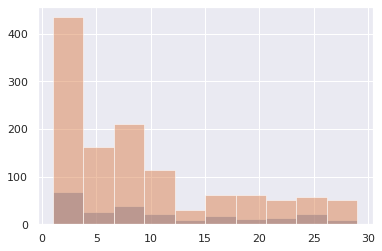

DescribeResult(nobs=237, minmax=(1, 29), mean=10.632911392405063, variance=71.44518343703068, skewness=0.6318715334830777, kurtosis=-0.8674734233081853)
DescribeResult(nobs=1233, minmax=(1, 29), mean=8.915652879156529, variance=64.2022953729158, skewness=1.0278532177701256, kurtosis=-0.049035971751739904)


In [ ]:
# Testing for normality
plt.hist(attrited_yes['distancefromhome'], alpha = .5)
plt.hist(attrited_no['distancefromhome'], alpha = .5)
plt.show()

#####ax = sns.distplot(attrited_yes['distancefromhome'], bins=30)#####
print(stats.describe(attrited_yes['distancefromhome']))
print(stats.describe(attrited_no['distancefromhome']))

**We can see from the histogram that the distribution is not bell shaped (not normally distributed), so will proceed with Shapiro-Wilk to confirm**

In [ ]:
# Confirming normality or not
print(stats.shapiro(attrited_yes['distancefromhome']))
print(stats.shapiro(attrited_no['distancefromhome']))

(0.8959434628486633, 9.868997979944893e-12)
(0.8534793257713318, 2.4682859931885524e-32)


**Since the p-value of the shapiro test is far less than 0.05 therefore the data distribution is not normally distributed**

In [ ]:
# Using Kruscal_Wallis to check if there is any relashionship
stats.kruskal(attrited_yes['distancefromhome'], attrited_no['distancefromhome'])

KruskalResult(statistic=9.225723965000004, pvalue=0.002386383151703113)

**Since the p-value is less than 0.05, we can reject the null hypothesis that there is no significant relationship between how far employees live from work and their attrition.**

### **SECOND QUESTION: Is there no significant relationship between employees monthly salaries and their attrition.**

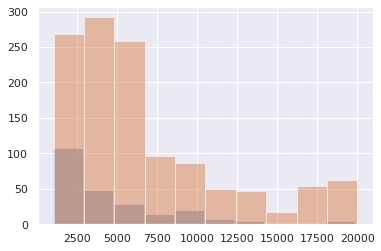

DescribeResult(nobs=237, minmax=(1009, 19859), mean=4787.0928270042195, variance=13251131.516770363, skewness=1.908966310070742, kurtosis=4.068929804278029)
DescribeResult(nobs=1233, minmax=(1051, 19999), mean=6832.739659367397, variance=23215128.338823583, skewness=1.2846660875596987, kurtosis=0.664057751851538)


In [ ]:
# Testing the second hypothesis
# Testing for normality
plt.hist(attrited_yes['monthlyincome'], alpha = 0.5)
plt.hist(attrited_no['monthlyincome'], alpha = 0.5)
plt.show()

#####ax = sns.distplot(attrited_yes['monthlyincome'], bins=30)#####
print(stats.describe(attrited_yes['monthlyincome']))
print(stats.describe(attrited_no['monthlyincome']))

**We can see from the histogram that the distribution is not bell shaped (not normally distributed), so will proceed with Shapiro-Wilk to confirm**

In [ ]:
# Confirming normality or not
print(stats.shapiro(attrited_yes['monthlyincome']))
print(stats.shapiro(attrited_no['monthlyincome']))

(0.7798969745635986, 1.5025734172664523e-17)
(0.8341342210769653, 5.970143412461947e-34)


**Since the p-value of the shapiro test is far less than 0.05 therefore the data distribution is not normally distributed**

In [ ]:
# Using Kruscal_Wallis to check if there is any relashionship
stats.kruskal(attrited_yes['monthlyincome'], attrited_no['monthlyincome'])

KruskalResult(statistic=57.768241263784475, pvalue=2.948926498830519e-14)

**Since the p-value is less than 0.05, we can reject the null hypothesis that there is no significant relationship between employees monthly salaries and their attrition.**

## **5. Results**
Based on visual inspection and the Shapiro-Wilk test, both work distance from home and monthly income are not normally distributed therefore I used the Kruskal-Wallis test to determine if there are statistically significant relationship between both vaiables and attrition. Based on the (p-value < 0.0001) I reject both null hypotheses that there is no significant relationship between how far employees live from work or their monthly income and their attrition and can say that at a 95% confidence level there is a siginificant relationship between distance and income to attrition.

## **6. Discussion and recommendation**
As we can tell from this experiment, at a 95% confidence level there is a  significant relationship between the employees monthly income or how far they live from work and their attrition. To follow-up on this experiment we could test other variables to check if they have any significant relationships to attrition.